**Here is the first part of the investigation where the roots of the transcendental equation, $xcot(x) = k$ are found using graphical methods**

C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sign


3.14031403140314
1.5534288893063029
[ 0.          3.14031403  4.33443344  6.28262826  7.58275828  9.42294229
 10.77307731 12.56525653 13.94539454 15.70757076 17.10771077 18.84788479] [1.         1.55342889 1.71770051 1.95631866 2.10053356 2.2891754
 2.41824002 2.57960567 2.69730005 2.84049412 2.94931684 3.07921226]


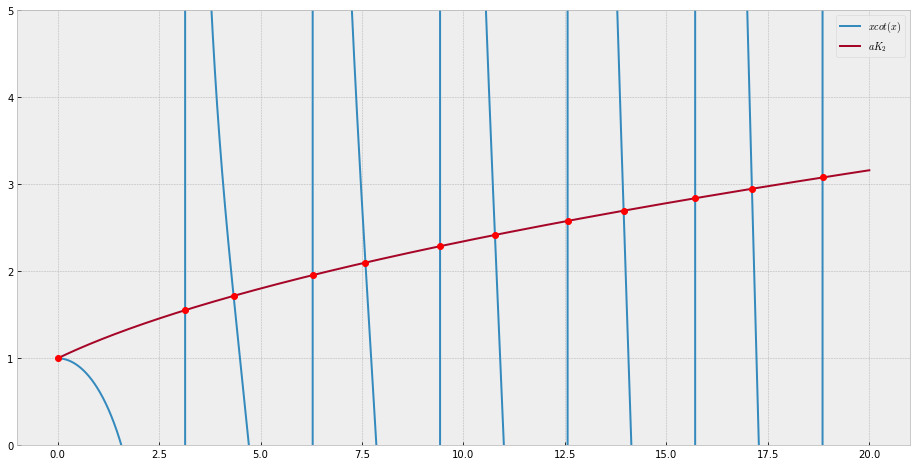

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

m = 1877
h = (6.5821e-16)**(2)
a = 2.1e-17**2

E = np.linspace(h/(2*m*a),10*h/(2*m*a),10000)

a = 2.1e-17
k = np.sqrt(2*m*E/h)*a

#print(k)


plt.figure(figsize=(16,8))
plt.style.use('bmh')
x = np.linspace(0,20,10000)
plt.ylim(0,5)
plt.plot(x,x/np.tan(x),label='$xcot(x)$')
plt.plot(x,k,label='$aK_2$')
plt.legend(loc=1)
idx = np.argwhere(np.diff(np.sign(x/np.tan(x) - k))).flatten()
plt.plot(x[idx], k[idx], 'ro')
plt.savefig('Trans roots.png',bbox_inches = 'tight')

print(x[idx][1])
print(k[idx][1])
print(x[idx],k[idx])
#We dont use the first point of intersection as this is a trivial solution

All values of x and k for roots can be found in the data appendix

In [82]:
E1 = ((k[idx][1]/a)**2)*(h/2*m)
print('The energy required for the first bound state can be estimated as', E1/1e6,'MeV.', 'This is known as the binding engery')
print('Since our solutions lies along the tangent of x(cot(x)) we cannot use the value of x as succifienct accuray is not available for calculating an exact value for Vo, as such as we employ the NR method')

The energy required for the first bound state can be estimated as 2.2248841122958942 MeV. This is known as the binding engery
Since our solutions lies along the tangent of x(cot(x)) we cannot use the value of x as succifienct accuray is not available for calculating an exact value for Vo, as such as we employ the NR method


**For the second part we now use the Newton-Raphson methods to determine $V_0$ iteratively from our initial estimate of E ~ 2.22MeV**

In [83]:
m = 1877
B = a*(np.sqrt(2*m*E1/h))
print(E1)
print(B)

#Defining our function and its derivative
def fn(x):
    y = x*np.cos(x) + B*np.sin(x)
    return y

#derivative of our function
def dfn(x):
    y = x*np.cos(x)+np.sin(x)+B*np.cos(x)
    return y 


2224884.1122958944
2915.78602522793


In [84]:
#starting at x ~ x[idx][1], our first root estimate
x1 = x[idx][2]
y1 = fn(x1)

# iterate until y is close to zero: 1e-4
nrerr=1e-4
# avoid infinite loops: limit to 1000
ix = 0
#while (abs(y1) > nrerr) and (ix < 1000):
while (ix < 6):
    print(ix, x1, fn(x1), dfn(x1), fn(x1)/dfn(x1) )
    x1 = x1 - fn(x1)/dfn(x1)
    y1 = fn(x1)
    ix+=1
    
    
print('number of iterations = ', ix)

0 4.334433443344334 -2711.5923404767773 -1078.5154120917182 2.5141897000969147
1 1.8202437432474197 2825.0901277400553 -719.2960822103945 -3.927576136739912
2 5.747819879987332 -1482.5603033288082 2512.2492828158215 -0.5901326406856807
3 6.337952520673013 165.9381073963132 2917.797433887304 0.0568710169764041
4 6.281081503696608 0.1468313332219191 2922.0585364135063 5.0249278511079324e-05
5 6.281031254418097 0.000264600112402924 2922.0581233211446 9.05526520130221e-08
number of iterations =  6


In [85]:
#since we use our first root estimate we can use our first energy estimate
print(x1)
E1 = 2.22
v0 = ((x1**2)+(2*m*E1/h))*(h/2*m) 
print(v0/1e6)

6.281031163865445
7.82134638


In [88]:
print('We can say this result has converged to a solution as inputting the value back into our original equation provides a near zero answer, thus proving the X1 value is infact a near root solution, further iterations would imrpove this accuracy', x1*np.cos(x1) + B*np.sin(x1))

We can say this result has converged to a solution as inputting the value back into our original equation provides a near zero answer, thus proving the X1 value is infact a near root solution, further iterations would imrpove this accuracy 4.7679128289956907e-07
